In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
bank_data = '/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/bank-additional-full.csv'

In [169]:
data = pd.read_csv(bank_data, sep = ';')

In [170]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [171]:
data.reset_index(inplace=True)

In [172]:
data.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: floa

In [174]:
euribor = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/LIBOR EUR.csv')
euribor = euribor[['Date','3M']]

In [175]:
euribor['Date'] = pd.to_datetime(euribor['Date'])
euribor['3M'] = euribor['3M'].astype(str)

In [176]:
euribor.drop_duplicates(subset ="3M", 
                     keep = 'first', inplace = True)

In [177]:
euribor['euribor3m'] = euribor['3M'].apply(lambda x: x[0:5])

In [178]:
euribor.head()

,Date,3M,euribor3m
0,2010-11-30,0.9675,0.967
2,2010-11-26,0.96875,0.968
5,2010-11-23,0.97375,0.973
6,2010-11-22,0.97625,0.976
7,2010-11-19,0.97875,0.978


In [179]:
euribor.sort_values(by='euribor3m', ascending=False)

,Date,3M,euribor3m
549,2008-08-10,5.39125,5.391
548,2008-09-10,5.38625,5.386
550,2008-07-10,5.37125,5.371
547,2008-10-10,5.36625,5.366
551,2008-06-10,5.3375,5.337
...,...,...,...
159,2010-04-20,0.5818800000000001,0.581
166,2010-09-04,0.58063,0.580
172,2010-03-30,0.58,0.58
171,2010-03-31,0.5775,0.577


In [180]:
euribor['euribor3m'] = euribor['euribor3m'].astype(float)

In [181]:
data2= pd.merge(data,euribor, on='euribor3m', how='left')

In [182]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 49282
Data columns (total 24 columns):
index             49283 non-null int64
age               49283 non-null int64
job               49283 non-null object
marital           49283 non-null object
education         49283 non-null object
default           49283 non-null object
housing           49283 non-null object
loan              49283 non-null object
contact           49283 non-null object
month             49283 non-null object
day_of_week       49283 non-null object
duration          49283 non-null int64
campaign          49283 non-null int64
pdays             49283 non-null int64
previous          49283 non-null int64
poutcome          49283 non-null object
emp.var.rate      49283 non-null float64
cons.price.idx    49283 non-null float64
cons.conf.idx     49283 non-null float64
euribor3m         49283 non-null float64
nr.employed       49283 non-null float64
y                 49283 non-null object
Date        

In [183]:
data2.isna().sum()

index                 0
age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
Date              21021
3M                21021
dtype: int64

In [184]:
data.isna().sum()

index             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [185]:
data.sort_values(by='index', ascending=True, inplace=True)

In [186]:
data2.drop_duplicates(subset ="index", 
                     keep = 'first', inplace = True) 

In [187]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 49282
Data columns (total 24 columns):
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
Date        

In [188]:
data2.set_index('Date',inplace=True)
euribor.set_index('Date',inplace=True)
euribor['3M'] = euribor['3M'].astype(float)

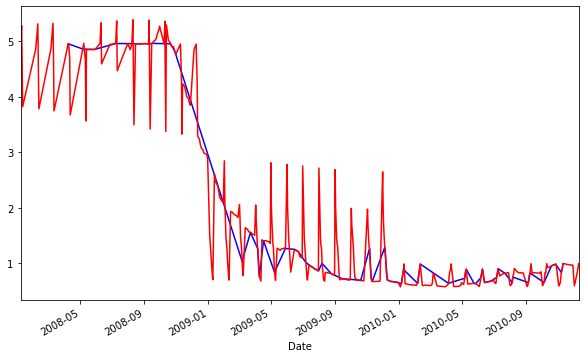

In [189]:
plt.figure(figsize=(10,6))
data2['euribor3m'].plot(color='blue')
euribor['3M'].plot(color='red')
plt.show()

In [190]:
data2.drop(columns='3M', inplace=True)

In [191]:
data2.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [192]:
data2.reset_index(inplace=True)

In [193]:
len(data2['Date'].unique())

78

In [194]:
data3 = data2.copy()

In [195]:
data2.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [196]:
data2.Date.isna().sum()

21021

In [197]:
datana  = data2[data2['Date'].isna()]

In [198]:
datana['Date'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [199]:
len(datana['euribor3m'].unique())

239

In [200]:
data3['Date'] = data3['Date'].ffill()

In [201]:
data3['Date'].isna().sum()

0

In [202]:
len(data3['Date'].unique())

77

In [203]:
data3['Date'].max()

Timestamp('2010-11-11 00:00:00')

In [204]:
data3['Date'].min()

Timestamp('2008-04-09 00:00:00')

In [205]:
data3.set_index(data3['Date'], inplace=True)

In [206]:
data3.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-29,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2008-05-29,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [207]:
data3.rename(columns={'Date':'Date_Stamp'}, inplace=True)

In [208]:
len(data3['Date_Stamp'].unique())

77

In [209]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41188 entries, 2008-05-29 to 2009-03-07
Data columns (total 23 columns):
Date_Stamp        41188 non-null datetime64[ns]
index             41188 non-null int64
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-

In [210]:
data3.to_csv('/Users/naweedahmed/Desktop/data3.csv')

In [211]:
por_eur_data = pd.read_csv('Portugal_Eurozone_data.csv')

In [212]:
headers = por_eur_data.iloc[0]
por_eur_data  = pd.DataFrame(por_eur_data.values[1:], columns=headers)

In [213]:
por_eur_data['Date'] = pd.to_datetime(por_eur_data['Date'])

In [214]:
por_eur_data.rename(columns={'Date':'Date_Stamp'}, inplace=True)

In [215]:
por_eur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 11 columns):
Date_Stamp                         783 non-null datetime64[ns]
MOM Inflation                      783 non-null object
Wage Growth                        783 non-null object
EURUSD                             783 non-null object
euro zoneGDP Growth Rate           783 non-null object
Portugal Income Tax annual rate    783 non-null object
Portugal Bank Lending Rate         783 non-null object
Portugal Personal Savings          783 non-null object
Portugal Wages                     783 non-null object
Portugal Unemployment Rate         783 non-null object
Portugal Sales Tax                 783 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 67.4+ KB


In [216]:
merged_df = pd.merge(data3, por_eur_data, on='Date_Stamp', how='left')

In [221]:
merged_df.isna().sum()

Date_Stamp                            0
index                                 0
age                                   0
job                                   0
marital                               0
education                             0
default                               0
housing                               0
loan                                  0
contact                               0
month                                 0
day_of_week                           0
duration                              0
campaign                              0
pdays                                 0
previous                              0
poutcome                              0
emp.var.rate                          0
cons.price.idx                        0
cons.conf.idx                         0
euribor3m                             0
nr.employed                           0
y                                     0
MOM Inflation                      2231
Wage Growth                        2231


In [222]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 33 columns):
Date_Stamp                         41188 non-null datetime64[ns]
index                              41188 non-null int64
age                                41188 non-null int64
job                                41188 non-null object
marital                            41188 non-null object
education                          41188 non-null object
default                            41188 non-null object
housing                            41188 non-null object
loan                               41188 non-null object
contact                            41188 non-null object
month                              41188 non-null object
day_of_week                        41188 non-null object
duration                           41188 non-null int64
campaign                           41188 non-null int64
pdays                              41188 non-null int64
previous                         

In [218]:
41188 - 38957

2231

In [219]:
data2= pd.merge(data,euribor, on='euribor3m', how='left')

In [220]:
date_extract = pd.DataFrame(data2['Date_Stamp']).reset_index().drop(columns='Date')

KeyError: 'Date_Stamp'

In [164]:
date_extract.info()

NameError: name 'date_extract' is not defined

In [165]:
date_extract.info()

NameError: name 'date_extract' is not defined

In [ ]:
additional_data = pd.read_csv('additional_data.csv')

In [ ]:
additional_data.drop(columns='Unnamed: 0', inplace=True)

In [58]:
additional_data.head()

,Date_Stamp,EURUSD,euro_zone_growth,euro_zone_ibr,por_av_wage,por_bank_lending,por_income_tax,por_infl,por_personal_saving,por_unemployment
0,2010-12-30,1.3283,0.5,-0.3064,809.34,6.69,40.0,0.0,13.7,7.3
1,2010-12-29,1.3224,0.5,-0.3064,809.34,6.69,40.0,0.0,13.7,7.3
2,2010-12-28,1.3120,0.5,-0.3064,809.34,6.69,40.0,0.0,13.7,7.3
3,2010-12-27,1.3161,0.5,-0.3064,809.34,6.69,40.0,0.0,13.7,7.3
4,2010-12-24,1.3118,0.5,-0.3064,809.34,6.69,40.0,0.0,13.7,7.3


In [64]:
additional_data['Date_Stamp']  = pd.to_datetime(additional_data['Date_Stamp'])

In [ ]:
additional_data['Date_Stamp'].

In [162]:
merged_dates = pd.merge(date_extract, additional_data, on='Date_Stamp', how='left') 

NameError: name 'date_extract' is not defined

In [ ]:
merged_dates.head()

In [78]:
merged_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26667 entries, 0 to 26666
Data columns (total 10 columns):
Date_Stamp             26667 non-null datetime64[ns]
EURUSD                 26667 non-null float64
euro_zone_growth       26667 non-null float64
euro_zone_ibr          26667 non-null float64
por_av_wage            26667 non-null float64
por_bank_lending       26667 non-null float64
por_income_tax         26667 non-null float64
por_infl               26667 non-null float64
por_personal_saving    26667 non-null float64
por_unemployment       26667 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.2 MB


In [281]:
data_list = list(data2.columns)

In [282]:
for col in data_list:
    print('Values for {}:\n{}\n\n'.format(col, data2[col].value_counts()))

Values for Date:
2008-05-29    2868
2008-07-31    2613
2008-07-08    2487
2008-09-06    1902
2008-05-28    1210
              ... 
2009-10-20       3
2010-06-29       3
2010-11-10       3
2010-06-10       3
2010-10-20       2
Name: Date, Length: 77, dtype: int64


Values for index:
2047     1
34042    1
38232    1
11599    1
9550     1
        ..
33445    1
35492    1
21151    1
23198    1
0        1
Name: index, Length: 41188, dtype: int64


Values for age:
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Values for job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Values for marital:
married     24928
single      11568
divo